In [1]:
#!/usr/bin/env python
from __future__ import division
from __future__ import print_function
from builtins import zip
from builtins import str
from builtins import map
from builtins import range
from past.utils import old_div
try:
    get_ipython().magic(u'load_ext autoreload')
    get_ipython().magic(u'autoreload 2')    
except:
    print('Not IPYTHON')
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')   
import caiman as cm
from caiman.source_extraction import cnmf
from caiman.utils.utils import download_demo
from caiman.utils.visualization import inspect_correlation_pnr
from caiman.components_evaluation import estimate_components_quality_auto
from caiman.motion_correction import motion_correct_oneP_rigid, motion_correct_oneP_nonrigid
import os
import cv2
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour

try:
    cv2.setNumThreads(1)
except:
    print('Open CV is naturally single threaded')
import bokeh.plotting as bpl
bpl.output_notebook()

/home/fbattaglia/anaconda3/envs/caiman/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading BokehJS ...

In [2]:
cd ~/Data/20170710_120637/

/home/fbattaglia/Data/20170710_120637


### loading one entire trial

In [3]:
import glob
rec_prefix = 'ds_recording_20170710'
fnames = glob.glob(rec_prefix + '*.tif')[::-1]
fnames.sort()

In [4]:
len(fnames)

50

In [5]:

frate = 10 # movie frame rate
gSig = 5   # gaussian width of a 2D gaussian kernel, which approximates a neuron
gSiz = 15  # average diameter of a neuron
do_motion_correction = True

In [6]:
try:
    dview.terminate() # stop it if it was running
except:
    pass

c, dview, n_processes = cm.cluster.setup_cluster(backend='local', # use this one
                                                 n_processes=8,  # number of process to use, if you go out of memory try to reduce this one
                                                 )

0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
10
0
10
10
10
10
10
10
0
10
0
0
0
0
0
0
10
10
0
10
10
10
10
10
10
0
0
0
0
10
10
10
10
0
0
0
0
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
10
0
0
10
10
10
10
10
0
0
0
10
10
0
0
10
0
10
10
10
0
0
10
0
0
10
0
10
0
10
10
10
0
0
0
10
0
10
10
10
0
0
0
0
10
10
10
10
10
10
0
0
0
10
10
0
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
10
0
0
10
10
10
10
10
10
0
0
10
0
0
0
10
10
0
0
0
10
0
10
0
10
10
10
0
10
10
0
10
0
0
10
0
0
0
10
10
10
10
0
0
0
10
10
10
10
10
0
0
0
0
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
10
10
10
10
0
0
0
0
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
0
10
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
10
10
10
10
0
0
0
0
10
10
10
10


0
0
10
10
0
0
10
10
10
0
10
0
0
0
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
10
0
0
0
0
10
10
10
0
10
10
10
10
10
0
0
0
0
10
10
10
0
10
0
0
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
0
10
0
0
0
0
0
0
0
10
10
10
10
10
10
10
0
10
0
0
0
0
0
0
10
0
10
10
0
10
10
10
10
10
0
0
0
0
0
0
0
10
10
10
10
10
10
0
0
10
10
0
0
10
10
10
10
0
0
0
0
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
10
0
0
0
0
10
10
10
10
10
10
0
10
0
0
0
0
10
0
0
10
10
0
10
10
10
0
10
0
0
0
10
10
10
10
10
0
0
0
0
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
10
0
0
10
0
10
10
10
10
10
0
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
0
10
0
10
0
0
0
0
0
10
0
10
10
10
10
10
0
10
10
0
0
10
0
10
10
0
10
0
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
10
10
10
10
10
10


100%|██████████| 50/50 [03:56<00:00,  4.73s/it]


Rigid Motion Correction
6.1698403
-0.6070436280965805


/home/fbattaglia/src/extern/CaImAn_stable/caiman/base/movies.py:260: UserWarning: ** Pixels averages are too negative. Removing 1 percentile. **
  '** Pixels averages are too negative. Removing 1 percentile. **')
/home/fbattaglia/src/extern/CaImAn_stable/caiman/base/movies.py:279: UserWarning: Pixels averages are too negative for template. Removing 1 percentile.
  'Pixels averages are too negative for template. Removing 1 percentile.')


cubic interpolation
-0.6070436280965805
cubic interpolation
-0.6070436280965805
cubic interpolation
Adding to movie 6.1698403
0
saving!
** Startting parallel motion correction **
** Finished parallel motion correction **
0.13650118
Adding to movie 6.1698403
0
saving!
** Startting parallel motion correction **
** Finished parallel motion correction **
0.33293742
Adding to movie 6.1698403
0
saving!
** Startting parallel motion correction **
** Finished parallel motion correction **
0.46373048
Adding to movie 6.1698403
0
saving!
** Startting parallel motion correction **
** Finished parallel motion correction **
0.326497
Adding to movie 6.1698403
0
saving!
** Startting parallel motion correction **
** Finished parallel motion correction **
0.26712868
Adding to movie 6.1698403
0
saving!
** Startting parallel motion correction **
** Finished parallel motion correction **
0.5432058
Adding to movie 6.1698403
0
saving!
** Startting parallel motion correction **
** Finished parallel motion corr

mmap
ds_recording_20170710_122659-000_rig__d1_400_d2_600_d3_1_order_F_frames_674_.mmap
loading in memory
mmap
ds_recording_20170710_122659-001_rig__d1_400_d2_600_d3_1_order_F_frames_674_.mmap
loading in memory
mmap
ds_recording_20170710_122659-002_rig__d1_400_d2_600_d3_1_order_F_frames_674_.mmap
loading in memory
mmap
ds_recording_20170710_122659-003_rig__d1_400_d2_600_d3_1_order_F_frames_674_.mmap
loading in memory
mmap
ds_recording_20170710_122659-004_rig__d1_400_d2_600_d3_1_order_F_frames_310_.mmap
loading in memory
mmap
ds_recording_20170710_123431-000_rig__d1_400_d2_600_d3_1_order_F_frames_674_.mmap
loading in memory
mmap
ds_recording_20170710_123431-001_rig__d1_400_d2_600_d3_1_order_F_frames_674_.mmap
loading in memory
mmap
ds_recording_20170710_123431-002_rig__d1_400_d2_600_d3_1_order_F_frames_674_.mmap
loading in memory
mmap
ds_recording_20170710_123431-003_rig__d1_400_d2_600_d3_1_order_F_frames_674_.mmap
loading in memory
mmap
ds_recording_20170710_123431-004_rig__d1_400_d2_60

memmap_0023_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12000)
memmap_0024_d1_400_d2_600_d3_1_order_C_frames_587_.mmap
(0, 12000)
memmap_0025_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12000)
memmap_0026_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12000)
memmap_0027_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12000)
memmap_0028_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12000)
memmap_0029_d1_400_d2_600_d3_1_order_C_frames_314_.mmap
(0, 12000)
memmap_0030_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12000)
memmap_0031_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12000)
memmap_0032_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12000)
memmap_0033_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12000)
memmap_0034_d1_400_d2_600_d3_1_order_C_frames_548_.mmap
(0, 12000)
memmap_0035_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12000)
memmap_0036_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12000)
memmap_0037_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(0, 12

memmap_0047_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(24000, 36000)
memmap_0048_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(24000, 36000)
memmap_0049_d1_400_d2_600_d3_1_order_C_frames_363_.mmap
(24000, 36000)
done
(12000, 31499)
memmap_0000_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(36000, 48000)
memmap_0001_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(36000, 48000)
memmap_0002_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(36000, 48000)
memmap_0003_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(36000, 48000)
memmap_0004_d1_400_d2_600_d3_1_order_C_frames_529_.mmap
(36000, 48000)
memmap_0005_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(36000, 48000)
memmap_0006_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(36000, 48000)
memmap_0007_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(36000, 48000)
memmap_0008_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(36000, 48000)
memmap_0009_d1_400_d2_600_d3_1_order_C_frames_456_.mmap
(36000, 48000)
memmap_0010_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(

memmap_0015_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap_0016_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap_0017_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap_0018_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap_0019_d1_400_d2_600_d3_1_order_C_frames_310_.mmap
(60000, 72000)
memmap_0020_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap_0021_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap_0022_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap_0023_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap_0024_d1_400_d2_600_d3_1_order_C_frames_587_.mmap
(60000, 72000)
memmap_0025_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap_0026_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap_0027_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap_0028_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(60000, 72000)
memmap

memmap_0031_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(84000, 96000)
memmap_0032_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(84000, 96000)
memmap_0033_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(84000, 96000)
memmap_0034_d1_400_d2_600_d3_1_order_C_frames_548_.mmap
(84000, 96000)
memmap_0035_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(84000, 96000)
memmap_0036_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(84000, 96000)
memmap_0037_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(84000, 96000)
memmap_0038_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(84000, 96000)
memmap_0039_d1_400_d2_600_d3_1_order_C_frames_380_.mmap
(84000, 96000)
memmap_0040_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(84000, 96000)
memmap_0041_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(84000, 96000)
memmap_0042_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(84000, 96000)
memmap_0043_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(84000, 96000)
memmap_0044_d1_400_d2_600_d3_1_order_C_frames_544_.mmap
(84000, 96000)
memmap

memmap_0047_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(108000, 120000)
memmap_0048_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(108000, 120000)
memmap_0049_d1_400_d2_600_d3_1_order_C_frames_363_.mmap
(108000, 120000)
done
(12000, 31499)
memmap_0000_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(120000, 132000)
memmap_0001_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(120000, 132000)
memmap_0002_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(120000, 132000)
memmap_0003_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(120000, 132000)
memmap_0004_d1_400_d2_600_d3_1_order_C_frames_529_.mmap
(120000, 132000)
memmap_0005_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(120000, 132000)
memmap_0006_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(120000, 132000)
memmap_0007_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(120000, 132000)
memmap_0008_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(120000, 132000)
memmap_0009_d1_400_d2_600_d3_1_order_C_frames_456_.mmap
(120000, 132000)
memmap_0010_d1_400_d2_600_d3_1_

memmap_0013_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(144000, 156000)
memmap_0014_d1_400_d2_600_d3_1_order_C_frames_508_.mmap
(144000, 156000)
memmap_0015_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(144000, 156000)
memmap_0016_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(144000, 156000)
memmap_0017_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(144000, 156000)
memmap_0018_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(144000, 156000)
memmap_0019_d1_400_d2_600_d3_1_order_C_frames_310_.mmap
(144000, 156000)
memmap_0020_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(144000, 156000)
memmap_0021_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(144000, 156000)
memmap_0022_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(144000, 156000)
memmap_0023_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(144000, 156000)
memmap_0024_d1_400_d2_600_d3_1_order_C_frames_587_.mmap
(144000, 156000)
memmap_0025_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(144000, 156000)
memmap_0026_d1_400_d2_600_d3_1_order_C_frames_674_.

memmap_0029_d1_400_d2_600_d3_1_order_C_frames_314_.mmap
(168000, 180000)
memmap_0030_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(168000, 180000)
memmap_0031_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(168000, 180000)
memmap_0032_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(168000, 180000)
memmap_0033_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(168000, 180000)
memmap_0034_d1_400_d2_600_d3_1_order_C_frames_548_.mmap
(168000, 180000)
memmap_0035_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(168000, 180000)
memmap_0036_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(168000, 180000)
memmap_0037_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(168000, 180000)
memmap_0038_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(168000, 180000)
memmap_0039_d1_400_d2_600_d3_1_order_C_frames_380_.mmap
(168000, 180000)
memmap_0040_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(168000, 180000)
memmap_0041_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(168000, 180000)
memmap_0042_d1_400_d2_600_d3_1_order_C_frames_674_.

memmap_0048_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(192000, 204000)
memmap_0049_d1_400_d2_600_d3_1_order_C_frames_363_.mmap
(192000, 204000)
done
(12000, 31499)
memmap_0000_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(204000, 216000)
memmap_0001_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(204000, 216000)
memmap_0002_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(204000, 216000)
memmap_0003_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(204000, 216000)
memmap_0004_d1_400_d2_600_d3_1_order_C_frames_529_.mmap
(204000, 216000)
memmap_0005_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(204000, 216000)
memmap_0006_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(204000, 216000)
memmap_0007_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(204000, 216000)
memmap_0008_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(204000, 216000)
memmap_0009_d1_400_d2_600_d3_1_order_C_frames_456_.mmap
(204000, 216000)
memmap_0010_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(204000, 216000)
memmap_0011_d1_400_d2_600_d3_1_

memmap_0010_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(228000, 240000)
memmap_0011_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(228000, 240000)
memmap_0012_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(228000, 240000)
memmap_0013_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(228000, 240000)
memmap_0014_d1_400_d2_600_d3_1_order_C_frames_508_.mmap
(228000, 240000)
memmap_0015_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(228000, 240000)
memmap_0016_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(228000, 240000)
memmap_0017_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(228000, 240000)
memmap_0018_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(228000, 240000)
memmap_0019_d1_400_d2_600_d3_1_order_C_frames_310_.mmap
(228000, 240000)
memmap_0020_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(228000, 240000)
memmap_0021_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(228000, 240000)
memmap_0022_d1_400_d2_600_d3_1_order_C_frames_674_.mmap
(228000, 240000)
memmap_0023_d1_400_d2_600_d3_1_order_C_frames_674_.

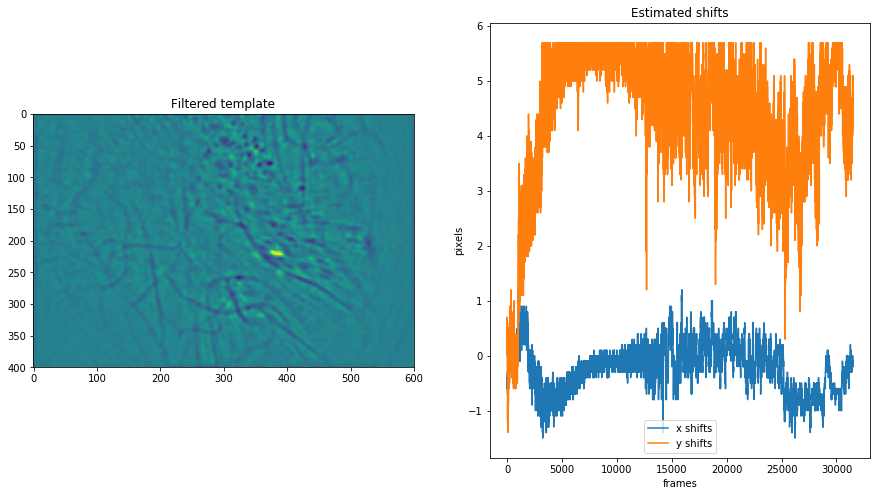

In [7]:
if do_motion_correction:
    mc = motion_correct_oneP_rigid(fnames,                        # name of file to motion correct
                               gSig_filt = [gSig]*2,                 # size of filter, xhange this one if algorithm does not work 
                               max_shifts = [5,5],                   # maximum shifts allowed in each direction 
                               dview=dview, 
                               splits_rig = 40,                      # number of chunks for parallelizing motion correction (remember that it should hold that length_movie/num_splits_to_process_rig>100) 
                               save_movie = True)                    # whether to save movie in memory mapped format
    
    new_templ = mc.total_template_rig
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)    
    plt.title('Filtered template')
    plt.imshow(new_templ)       #% plot template
    plt.subplot(1,2,2)
    plt.title('Estimated shifts')
    plt.plot(mc.shifts_rig)     #% plot rigid shifts
    plt.legend(['x shifts', 'y shifts'])
    plt.xlabel('frames')
    plt.ylabel('pixels')
    
    bord_px_rig = np.ceil(np.max(mc.shifts_rig)).astype(np.int)     #borders to eliminate from movie because of motion correction        
    fname_new = cm.save_memmap(mc.fname_tot_rig, base_name='memmap_', order = 'C') # transforming memoruy mapped file in C order (efficient to perform computing)
else:
    #% create memory mappable file
    fname_new = cm.save_memmap(fnames, base_name='memmap_', order = 'C')

# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
Y = Yr.T.reshape((T,) + dims, order='F')

In [8]:
try:
    dview.terminate() # stop it if it was running
except:
    pass

c, dview, n_processes = cm.cluster.setup_cluster(backend='local', # use this one
                                                 n_processes=8,  # number of process to use, if you go out of memory try to reduce this one
                                                 )

(31499, 81, 81)
(31499, 81, 81)
(31499, 81, 81)
(31499, 81, 81)
using 1 processes
using 1 processes
using 1 processes
using 1 processes
using 1600 pixels per process
using 1600 pixels per process
using 5000 block_size
using 5000 block_size
using 1600 pixels per process
using 1600 pixels per process
using 5000 block_size
using 5000 block_size
preprocessing ...
preprocessing ...
preprocessing ...
preprocessing ...
checking if missing data
checking if missing data
checking if missing data
checking if missing data
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessi

/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]
/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]
/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of ma

0 neurons have been initialized
0 neurons have been initialized
0 neurons have been initialized
In total,  1 neurons were initialized.
Compute Background
In total,  2 neurons were initialized.
Compute Background
In total,  3 neurons were initialized.
Compute Background
Compute Residuals
Initialization again
Compute Residuals
Initialization again
Compute Residuals
Initialization again


/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]
/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


In total,  0 neurons were initialized.
Update Temporal
Generating residuals
Compute Residuals
Initialization again
0 neurons have been initialized
In total,  1 neurons were initialized.
Update Temporal
0 neurons have been initialized
In total,  1 neurons were initialized.
Update Temporal
Generating residuals
Generating residuals


/home/fbattaglia/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


entering the deconvolution 
entering the deconvolution 
entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
1 out of total 1 temporal components updated
memmaping
1 out of total 1 temporal components updated
Compute Residuals
stopping: overall temporal component not changing significantly
Initialization again
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
In total,  0 neurons were initialized.
Update Temporal
1 out of total 1 temporal components updated
Generating residuals
1 out of total 1 temporal components updated
memmaping
Updating Spatial Components using lasso lars
stop

/home/fbattaglia/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


computing the distance indicators
memmaping
entering the deconvolution 
stopping: overall temporal component not changing significantly
Updating Spatial Components using lasso lars
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
thresholding components
computing the distance indicators
Computing residuals
--- 0.7145578861236572 seconds ---
Removing tempfiles created
memmaping
Compute Background Again
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 0.23801112174987793 seconds ---
Removing tempfiles created
Compute Background Again


/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


thresholding components
Computing residuals
--- 1.5347168445587158 seconds ---
Removing tempfiles created
Compute Background Again
0 neurons have been initialized
thresholding components
Computing residuals
--- 2.0265722274780273 seconds ---
Removing tempfiles created
Compute Background Again
In total,  2 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
2 out of total 2 temporal components updated
2 out of total 2 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 0.6756632328033447 seconds ---
Removing tempfiles created
Compute Background Again
Compute Residuals
Initialization again
Compute Res

/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
Estimate low rank Background
6560
Estimate low rank Background
Estimate low rank Background


/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6560


/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
1999
2999


/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


3999
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
4999
parallel dot product block size: 1000
Start product
Transposing
999
5999
1999
initializing ...
6560
2999
thresholding components
Computing residuals
--- 73.45435070991516 seconds ---
Removing tempfiles created
Spatial Downsampling 1-photon
3999
Compute Background Again
4999
Roi Extraction...
One photon initialization..
5999
In total,  0 neurons were initialized.
Compute Background
6560
Estimate low rank Background


/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


Compute Residuals
Initialization again
parallel dot product block size: 1000
Start product
Transposing
999
In total,  0 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 0.11444878578186035 seconds ---
Removing tempfiles created
Compute Background Again


/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


1999
2999
3999
parallel dot product block size: 1000
Start product
Transposing
999
4999
1999
2999
5999
6560
3999
4999
5999
6560


/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


parallel dot product block size: 1000
Start product
Transposing
999
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
1999
2999
initializing ...
3999
Spatial Downsampling 1-photon
4999
Roi Extraction...
One photon initialization..
5999
In total,  0 neurons were initialized.
Compute Background
6560


/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/initialization.py:1100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  f_in = np.linalg.lstsq(b_in, B)[0]


Compute Residuals
Initialization again
In total,  0 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
parallel dot product block size: 1000
Computing residuals
Start product
--- 0.031113624572753906 seconds ---
Removing tempfiles created
Transposing
Compute Background Again
999
1999
2999
3999
4999
5999
Update Temporal
6560
Generating residuals
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
Update Temporal
initializing ...
Spatial Downsampling 1-photon
entering the deconvolution 
stopping: overall temporal component n

computing the distance indicators
memmaping
parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
Generating residuals
4999
5999
6560
Updating Spatial Components using lasso lars
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 5.504969120025635 seconds ---
Removing tempfiles created
Compute Background Again
thresholding components
Computing residuals
--- 5.111200332641602 seconds ---
Removing tempfiles created
Compute Background Again
parallel dot product block size: 1000
Start product
Transposing
999
1999
entering the deconvolution 
1 out of total 3 temporal components updated
2999
2 out of total 3 temporal components updated
3 out of total 3 temporal components updated
3999
1 out of total 3 temporal components updated
2 out of total 3 temporal components updated
4999
3 out of total 3 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of

/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


0 neurons have been initialized
Compute Residuals
Initialization again
In total,  2 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
2 out of total 2 temporal components updated
2 out of total 2 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
(31499, 81, 80)
Initializing update of Spatial Components
using 1 processes
using 1600 pixels per process
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
using 5000 block_size
computing the distance indicators
preprocessing ...
memmaping
checking if missing data
Updating Spatial Components using lasso lars
In total,  0 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_pro

6 out of total 6 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 34.065102100372314 seconds ---
Removing tempfiles created
Compute Background Again
thresholding components
Computing residuals
--- 52.171740770339966 seconds ---
Removing tempfiles created
Compute Background Again
thresholding components
Computing residuals
--- 2.034850835800171 seconds ---
Removing tempfiles created
Compute Background Again
Generating residuals
Estimate low rank Background
Estimate low rank Background
entering the deconvolution 
1 out of total 3 temporal components updated
2 out of total 3 temporal components updated
3 out of total 3 temporal component

Compute Background Again
In total,  4 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
3 out of total 6 temporal components updated
4 out of total 6 temporal components updated
5 out of total 6 temporal components updated
6 out of total 6 temporal components updated
3 out of total 6 temporal components updated
4 out of total 6 temporal components updated
5 out of total 6 temporal components updated
6 out of total 6 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 9.391815900802612 seconds ---
Removing tempfiles created
Compute Background Again
thresholding components
Computing residuals
--- 1.

/home/fbattaglia/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 0.12357282638549805 seconds ---
Removing tempfiles created
Compute Background Again
thresholding components
Computing residuals
--- 2.3456122875213623 seconds ---
Removing tempfiles created
Compute Background Again
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
Generating residuals
initializing ...
thresholding components
Computing residuals
--- 21.348995208740234 seconds ---
Removing tempfiles created
Compute Background Again
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
0 ne

/home/fbattaglia/src/extern/CaImAn_stable/caiman/source_extraction/cnmf/deconvolution.py:1019: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


parallel dot product block size: 1000
Start product
Transposing
999
0 neurons have been initialized
In total,  1 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
1 out of total 1 temporal components updated
1 out of total 1 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
6560
1999
thresholding components
Computing residuals
--- 0.33899998664855957 seconds ---
Removing tempfiles created
Compute Background Again
2999
3999
4999
5999
6560
Generating residuals
entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memm

/home/fbattaglia/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 0.11298441886901855 seconds ---
Removing tempfiles created
Compute Background Again
Generating residuals
Estimate low rank Background
Estimate low rank Background
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
initializing ...
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
0 neurons have been initialized
In total,  1 neurons were initialized.
Compute Background
entering the deconvolution 
1 out of total 1 temporal components updated
1 out of total 1 temporal components updated


4 out of total 4 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
Generating residuals
parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
6560
entering the deconvolution 
2 out of total 4 temporal components updated
3 out of total 4 temporal components updated
(31499, 81, 81)
using 1 processes
4 out of total 4 temporal components updated
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
2 out of total 4 temporal components updated
3 out of total 4 temporal components updated
4 out of total 4 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
initializing ...
thresholding comp

2 out of total 4 temporal components updated
3 out of total 4 temporal components updated
4 out of total 4 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
initializing ...
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
0 neurons have been initialized
In total,  1 neurons were initialized.
Compute Background
Compute Residuals
Initialization again
0 neurons have been initialized
In total,  3 neurons were initialized.
Update Temporal
Generating residuals
entering the deconvolution 
2 out of total 4 temporal components updated
4 out of total 4 temporal components updated
2 out of total 4 temporal components updated
4 out of total 4 temporal components updated
stopping: overall temporal compon

Removing tempfiles created
Compute Background Again
entering the deconvolution 
1 out of total 1 temporal components updated
1 out of total 1 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 25.77668595314026 seconds ---
Removing tempfiles created
Compute Background Again
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
Compute Residuals
Initialization again
initializing ...
In total,  0 neurons were initialized.
Update Temporal
Generating residuals


/home/fbattaglia/anaconda3/envs/caiman/lib/python3.6/site-packages/scipy/sparse/dia.py:300: RuntimeWarning: divide by zero encountered in remainder
  c = np.arange(num_rows, dtype=np.intc) - (offsets % max_dim)[:, None]


entering the deconvolution 
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
Computing residuals
--- 0.09818816184997559 seconds ---
Removing tempfiles created
Compute Background Again
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
In total,  0 neurons were initialized.
Compute Background
Estimate low rank Background
thresholding components
Computing residuals
--- 12.126952648162842 seconds ---
Removing tempfiles created
Compute Background Again
Update Temporal
Compute Residuals
Initialization again
0 neurons have been initialized
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data

Compute Background Again
6560
Generating residuals
Estimate low rank Background
entering the deconvolution 
3 out of total 5 temporal components updated
5 out of total 5 temporal components updated
3 out of total 5 temporal components updated
5 out of total 5 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
initializing ...
Update Temporal
Spatial Downsampling 1-photon
Roi Extraction...
One photon initialization..
0 neurons have been initialized
In total,  1 neurons were initialized.
Compute Background
thresholding components
Computing residuals
--- 58.41885161399841 seconds ---
Removing tempfiles created
Compute Background Again
Update Temporal
parallel dot product block s

1999
2999
3999
4999
parallel dot product block size: 1000
Start product
Transposing
999
thresholding components
Computing residuals
--- 3.3023171424865723 seconds ---
Removing tempfiles created
Compute Background Again
5999
1999
2999
6560
3999
4999
Generating residuals
5999
Generating residuals
6560
parallel dot product block size: 1000
Start product
Transposing
999
1999
2999
3999
4999
5999
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
6560
entering the deconvolution 
entering the deconvolution 
1 out of total 2 temporal components updated
2 out of total 2 temporal components updated
1 out of total 2 temporal components updated
2 out of total 2 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
3 out of total 7 temporal components updated
memmaping
Updating Spatial Component

Initializing update of Spatial Components
computing the distance indicators
12 out of total 14 temporal components updated
13 out of total 14 temporal components updated
14 out of total 14 temporal components updated
memmaping
Updating Spatial Components using lasso lars
3 out of total 14 temporal components updated
5 out of total 14 temporal components updated
7 out of total 14 temporal components updated
8 out of total 14 temporal components updated
10 out of total 14 temporal components updated
12 out of total 14 temporal components updated
13 out of total 14 temporal components updated
14 out of total 14 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
thresholding components
C

2 out of total 4 temporal components updated
3 out of total 4 temporal components updated
4 out of total 4 temporal components updated
2 out of total 4 temporal components updated
3 out of total 4 temporal components updated
entering the deconvolution 
4 out of total 4 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
The number of pixels per process (n_pixels_per_process) is larger than the total number of pixels!! Decreasing suitably.
computing the distance indicators
memmaping
Updating Spatial Components using lasso lars
2 out of total 3 temporal components updated
3 out of total 3 temporal components updated
2 out of total 3 temporal components updated
3 out of total 3 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
memmaping
Updating Spatial Component

5 out of total 9 temporal components updated
8 out of total 9 temporal components updated
9 out of total 9 temporal components updated
stopping: overall temporal component not changing significantly
Update Spatial
Initializing update of Spatial Components
computing the distance indicators
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
memmaping
Updating Spatial Components using lasso lars
(31499, 81, 81)
using 1 processes
using 1600 pixels per process
using 5000 block_size
preprocessing ...
checking if missing data
parallel dot product block size: 1000
Start product
Transposing
999
1999
initializing ...
initializing ...
2999
Spatial Downsampling 1-photon
3999
Spatial Downsampling 1-photon
4999
Roi Extraction...
One photon initialization..
Roi Extraction...
One photon initialization..
5999
In total,  0 neurons were initialized.
Compute Background
6560
0 neurons have been initialized
In total,  3 neurons we

In [9]:
# compute some summary images (correlation and peak to noise)
cn_filter, pnr = cm.summary_images.correlation_pnr(Y, gSig=gSig, swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
# inspect the summary images and set the parameters
#inspect_correlation_pnr(cn_filter,pnr)


In [10]:
min_corr = .8 # min correlation of peak (from correlation image)
min_pnr = 10 # min peak to noise ratio
min_SNR = 3 # adaptive way to set threshold on the transient size
r_values_min = 0.85  # threshold on space consistency (if you lower more components will be accepted, potentially with worst quality)
decay_time = 0.4  #decay time of transients/indocator

In [11]:
m_orig = None

In [ ]:
Y.shape

In [ ]:
cnm = cnmf.CNMF(n_processes=n_processes, 
                method_init='corr_pnr',                 # use this for 1 photon
                k=70,                                   # neurons per patch
                gSig=(6, 6),                            # half size of neuron
                gSiz=(19, 19),                          # in general 3*gSig+1
                merge_thresh=.8,                        # threshold for merging
                p=1,                                    # order of autoregressive process to fit
                dview=dview,                            # if None it will run on a single thread
                tsub=4,                                 # downsampling factor in time for initialization, increase if you have memory problems             
                ssub=4,                                 # downsampling factor in space for initialization, increase if you have memory problems
                Ain=None,                               # if you want to initialize with some preselcted components you can pass them here as boolean vectors
                rf=(40, 40),                            # half size of the patch (final patch will be 100x100)
                stride=(40, 40),                        # overlap among patches (keep it at least large as 4 times the neuron size)
                only_init_patch=True,                   # just leave it as is
                gnb=16,                                 # number of background components
                nb_patch=16,                            # number of background components per patch
                method_deconvolution='oasis',           #could use 'cvxpy' alternatively
                low_rank_background=True,               #leave as is
                update_background_components=True,      # sometimes setting to False improve the results
                min_corr=min_corr,                      # min peak value from correlation image 
                min_pnr=min_pnr,                        # min peak to noise ration from PNR image
                normalize_init=False,                   # just leave as is
                center_psf=True,                        # leave as is for 1 photon
                del_duplicates=True)                    # whether to remove duplicates from initialization

cnm.fit(Y)

(31499, 400, 600)
using 8 processes
using 4000 pixels per process
using 5000 block_size
(80, 80)


In [10]:
crd = cm.utils.visualization.plot_contours(cnm.A, cn_filter, thr=.8, vmax=0.95)

NameError: name 'cn_filter' is not defined

In [11]:
#%% COMPONENT EVALUATION
# the components are evaluated in three ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
#   c) each shape passes a CNN based classifier

idx_components, idx_components_bad, comp_SNR, r_values, pred_CNN = estimate_components_quality_auto(
                            Y, cnm.A, cnm.C, cnm.b, cnm.f, cnm.YrA, frate, 
                            decay_time, gSig, dims, dview = dview, 
                            min_SNR=min_SNR, r_values_min = r_values_min, min_std_reject = 0.5, use_cnn = False)

print(' ***** ')
print((len(cnm.C)))
print((len(idx_components)))
print(r_values[idx_components_bad])

EVALUATING IN PARALLEL... NOT RETURNING ERFCs
 ***** 
195
195
[]


NameError: name 'cn_filter' is not defined

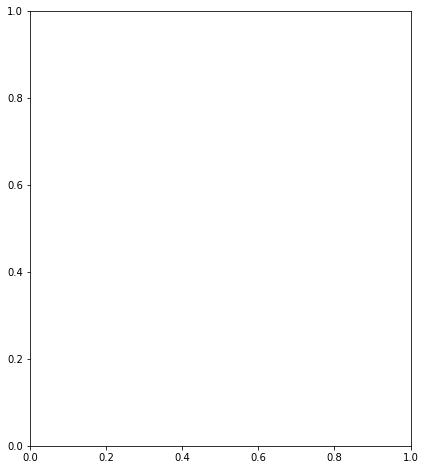

In [12]:
#%% PLOT COMPONENTS

plt.figure(figsize=(15,8));
plt.subplot(121);
crd = cm.utils.visualization.plot_contours(cnm.A.tocsc()[:,idx_components], cn_filter, thr=.8, vmax=0.95)
plt.title('Contour plots of accepted components')
plt.subplot(122); 
crd = cm.utils.visualization.plot_contours(cnm.A.tocsc()[:,idx_components_bad], cn_filter, thr=.8, vmax=0.95)
plt.title('Contour plots of rejected components')

In [ ]:
# accepted components
nb_view_patches(Yr, cnm.A.tocsc()[:, idx_components], cnm.C[idx_components], 
                cnm.b, cnm.f, dims[0], dims[1], YrA=cnm.YrA[idx_components], image_neurons = cn_filter,
                denoised_color = 'red', thr=0.8, cmap='gray');

In [18]:
# rejected components
nb_view_patches(Yr, cnm.A.tocsc()[:, idx_components_bad], cnm.C[idx_components_bad], 
                cnm.b, cnm.f, dims[0], dims[1], YrA=cnm.YrA[idx_components_bad], image_neurons = cn_filter,
                denoised_color = 'red', thr=0.8, cmap='gray');

In [19]:
cm.stop_server(dview=dview)

 done


### Movies

In [31]:
#%% denoised movie
cm.movie(np.reshape(cnm.A.tocsc()[:,idx_components].dot(cnm.C[idx_components])+cnm.b.dot(cnm.f),dims+(-1,), order = 'F').transpose(2,0,1)).play(magnification=3, gain = 1.2)

In [20]:
#%% only neurons
neur_movie = cm.movie(np.reshape(cnm.A.tocsc()[:,idx_components].dot(cnm.C[idx_components]),dims+(-1,), order = 'F').transpose(2,0,1))
#neur_movie

#neur_movie.play(magnification=1, gain = 10.)

In [21]:
neur_movie.save('neur_movie.tif')

.tif
tifffile package not found, using skimage instead for imsave


In [22]:
neur_movie.save('neur_movie.avi')

.avi


In [35]:
#%% only the background
cm.movie(np.reshape(cnm.b.dot(cnm.f),dims+(-1,), order = 'F').transpose(2,0,1)).play(magnification=3, gain = 1.)

In [36]:
#%% residuals
cm.movie(np.array(Y)-np.reshape(cnm.A.tocsc()[:,:].dot(cnm.C[:])+cnm.b.dot(cnm.f),dims+(-1,), order = 'F').transpose(2,0,1)).play(magnification=3, gain = 10., fr = 10)